## **The Iris Dataset**

In [7]:
import pandas as pd

iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce6fcc2390>,
      dtype=object)

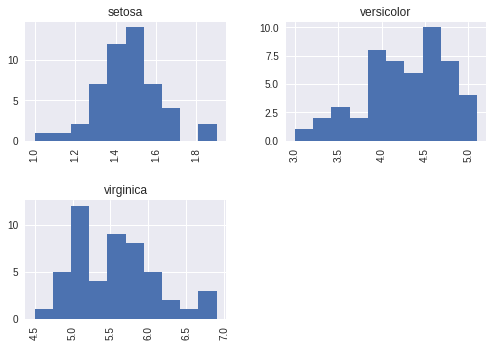

In [8]:
iris.hist(column='petal_length', by='species')

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
features = list(iris)  # List dataframe columns, similar to 'iris.columns'
class_col = 'species'
features.remove(class_col)

print("Features: " + str(features))

x = iris[features].values
y = iris[class_col].values

print(x[:10])
print(y[:10])

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


## **2-Dimensional Plot of the Iris Dataset using PCA**

Text(0.5,1,u'PCA of IRIS Dataset')

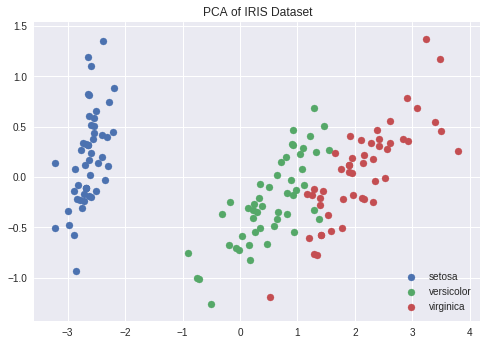

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_2d = pca.fit(x).transform(x)

plt.figure()

for idx, label in enumerate(set(y)):
    plt.scatter(x_2d[np.where(y == label), 0],
                x_2d[np.where(y == label), 1],
                label=label)

plt.legend(loc='best', scatterpoints=1)
plt.title('PCA of IRIS Dataset')

## **Hierarchical Clustering**

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import v_measure_score

hier_clus = AgglomerativeClustering(n_clusters=3,
                                    linkage='average',
                                    compute_full_tree=True)
hier_clus.fit(x)
clusters = hier_clus.labels_

v_score = v_measure_score(y, clusters)
print("V-Measure clusters quality: " + str(v_score))

# Many other metrics: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

V-Measure clusters quality: 0.805693691215336


## **K-Means Clustering**

Text(0.5,1,u'KMeans on IRIS Dataset')

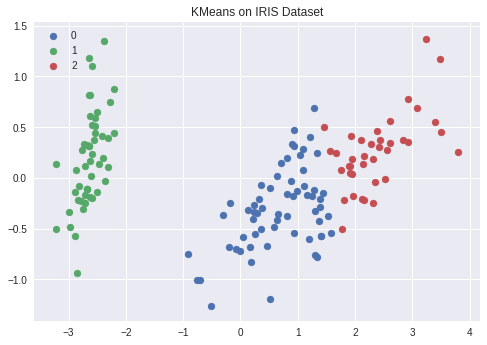

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clusters = kmeans.labels_


##################################
# Plot clusters
##################################
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_2d = pca.fit(x).transform(x)

plt.figure()

for idx, label in enumerate(set(clusters)):
    plt.scatter(x_2d[np.where(clusters == label), 0],
                x_2d[np.where(clusters == label), 1],
                label=label)

plt.legend(loc='best', scatterpoints=1)
plt.title('KMeans on IRIS Dataset')

## **Train/Test Split**

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.67,
                                                    stratify=y)
print("Train samples: " + str(len(x_train)))
print("Test samples: " + str(len(x_test)))

Train samples: 100
Test samples: 50


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## **Decision Tree Classfier**

Train accuracy: 0.97
Test accuracy: 0.98
Labels: ['setosa', 'versicolor', 'virginica']

Confusion matrix (True x Pred):
[[17  0  0]
 [ 0 16  0]
 [ 0  1 16]]


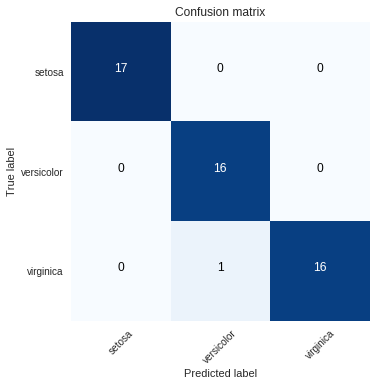

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=5)
classifier.fit(x_train, y_train)
train_acc = classifier.score(x_train, y_train)
test_acc = classifier.score(x_test, y_test)

print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

labels = list(set(y_test))
test_pred = classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, test_pred, labels=labels)

print("Labels: " + str(labels))
print("\nConfusion matrix (True x Pred):")
print(conf_matrix)


#################################
# Plot confusion matrix
#################################
import matplotlib.pyplot as plt
import itertools

fig = plt.figure()
ax = fig.gca()
ax.grid(False)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

for i, j in itertools.product(range(conf_matrix.shape[0]),
                              range(conf_matrix.shape[1])):
    plt.text(j, i, "{:,}".format(conf_matrix[i, j]),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

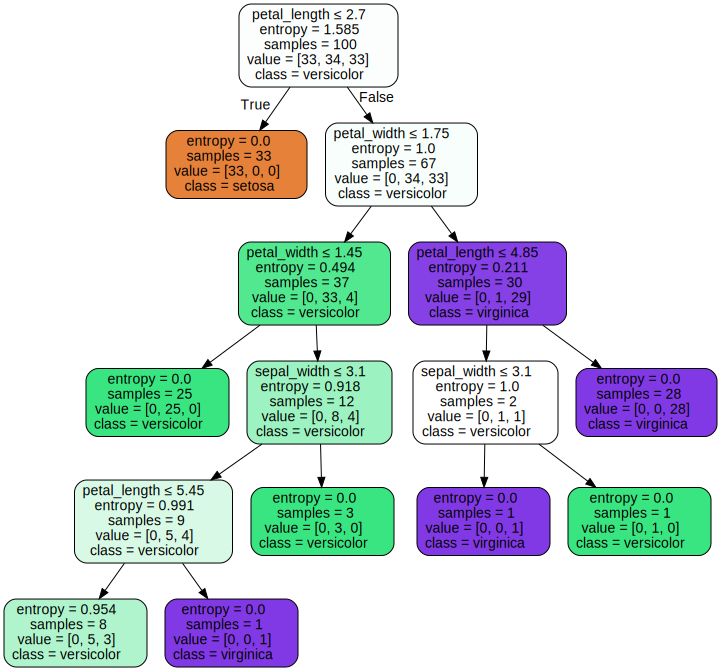

In [18]:
#!apt-get install graphviz
#!pip install graphviz
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(classifier,
                                out_file=None,
                                feature_names=features,
                                class_names=labels,
                                filled=True, rounded=True,  
                                special_characters=True) 
graphviz.Source(dot_data)

## **SVM Classifier**

Train accuracy: 0.97
Test accuracy: 0.98
Labels: ['setosa', 'versicolor', 'virginica']

Confusion matrix (True x Pred):
[[17  0  0]
 [ 0 17  0]
 [ 0  1 15]]


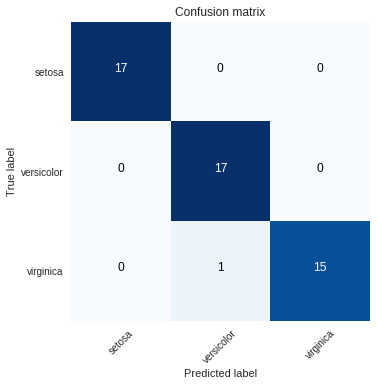

In [27]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)
train_acc = classifier.score(x_train, y_train)
test_acc = classifier.score(x_test, y_test)

print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

labels = list(set(y_test))
test_pred = classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, test_pred, labels=labels)

print("Labels: " + str(labels))
print("\nConfusion matrix (True x Pred):")
print(conf_matrix)


#################################
# Plot confusion matrix
#################################
import matplotlib.pyplot as plt
import itertools

fig = plt.figure()
ax = fig.gca()
ax.grid(False)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

for i, j in itertools.product(range(conf_matrix.shape[0]),
                              range(conf_matrix.shape[1])):
    plt.text(j, i, "{:,}".format(conf_matrix[i, j]),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()